Завантажуємо потрібні нам дані

In [11]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

movie_path = 'c:/Users/User/miniconda3/envs/labs/movies.dat'
rating_path = 'c:/Users/User/miniconda3/envs/labs/ratings.dat'
users_path = 'c:/Users/User/miniconda3/envs/labs/users.dat'

movies = pd.read_csv(movie_path, sep='::', usecols=[0, 1], 
                names = ['Movie_ID', 'Name'], encoding='latin1', engine='python')
ratings = pd.read_csv(rating_path, sep='::', usecols=[0, 1, 2],
                names=['User_ID', 'Movie_ID', 'Rating'], engine='python')
users = pd.read_csv(users_path, sep='::', usecols=[0, 1, 2],
                names=['User_ID', 'Gender', 'Age'], engine='python')

print('Movies\n', movies)
print('Ratings\n',ratings)
print('Users\n',users)

Movies
       Movie_ID                                Name
0            1                    Toy Story (1995)
1            2                      Jumanji (1995)
2            3             Grumpier Old Men (1995)
3            4            Waiting to Exhale (1995)
4            5  Father of the Bride Part II (1995)
...        ...                                 ...
3878      3948             Meet the Parents (2000)
3879      3949          Requiem for a Dream (2000)
3880      3950                    Tigerland (2000)
3881      3951             Two Family House (2000)
3882      3952               Contender, The (2000)

[3883 rows x 2 columns]
Ratings
          User_ID  Movie_ID  Rating
0              1      1193       5
1              1       661       3
2              1       914       3
3              1      3408       4
4              1      2355       5
...          ...       ...     ...
1000204     6040      1091       1
1000205     6040      1094       5
1000206     6040       562     

Об'єднуємо дані

In [12]:
data = pd.merge(movies, ratings, on='Movie_ID')
data = pd.merge(data, users, on='User_ID')

print(data)

         Movie_ID                                       Name  User_ID  Rating  \
0               1                           Toy Story (1995)        1       5   
1              48                          Pocahontas (1995)        1       5   
2             150                           Apollo 13 (1995)        1       5   
3             260  Star Wars: Episode IV - A New Hope (1977)        1       4   
4             527                    Schindler's List (1993)        1       5   
...           ...                                        ...      ...     ...   
1000204      3513                 Rules of Engagement (2000)     5727       4   
1000205      3535                     American Psycho (2000)     5727       2   
1000206      3536                   Keeping the Faith (2000)     5727       5   
1000207      3555                               U-571 (2000)     5727       3   
1000208      3578                           Gladiator (2000)     5727       5   

        Gender  Age  
0    

Перевіряємо на невідомі значення. Таких немає, йдемо далі.

In [13]:
print(data.isnull().sum())

Movie_ID    0
Name        0
User_ID     0
Rating      0
Gender      0
Age         0
dtype: int64


Групуємо фільми за значеннями віку користувачів та статі, а також рахуємо середнє значення рейтингу для кожної комбінації

In [14]:
avg_ratings = data.groupby(['Age', 'Gender', 'Name'])['Rating'].mean().reset_index()
print(avg_ratings)

       Age Gender                                   Name    Rating
0        1      F                   'Night Mother (1986)  3.000000
1        1      F              'Til There Was You (1997)  2.000000
2        1      F      10 Things I Hate About You (1999)  4.035714
3        1      F                  101 Dalmatians (1961)  3.812500
4        1      F                  101 Dalmatians (1996)  3.470588
...    ...    ...                                    ...       ...
40041   56      M  Young Poisoner's Handbook, The (1995)  4.000000
40042   56      M           Young Sherlock Holmes (1985)  3.266667
40043   56      M      Your Friends and Neighbors (1998)  4.000000
40044   56      M                     Zero Effect (1998)  3.666667
40045   56      M                        eXistenZ (1999)  2.200000

[40046 rows x 4 columns]


Групуємо залежно від статі та віку, для кожної пари обираємо топ-10 фільмів з найвищим рейтингом (14 груп)

In [15]:
groups = avg_ratings.groupby(['Age', 'Gender']).apply(lambda x: x.nlargest(10, 'Rating')).reset_index(drop=True)
print(groups)

     Age Gender                                               Name  Rating
0      1      F                                       8 1/2 (1963)     5.0
1      1      F  Adventures of Buckaroo Bonzai Across the 8th D...     5.0
2      1      F               Adventures of Robin Hood, The (1938)     5.0
3      1      F                                  Affliction (1997)     5.0
4      1      F                                       Akira (1988)     5.0
..   ...    ...                                                ...     ...
135   56      M                          Better Off Dead... (1985)     5.0
136   56      M                       Better Than Chocolate (1999)     5.0
137   56      M                                 Boys Life 2 (1997)     5.0
138   56      M                                     Careful (1992)     5.0
139   56      M                                      Carmen (1984)     5.0

[140 rows x 4 columns]


Виводимо значення для жінок 18 років

In [16]:
age_18 = groups[groups['Age'] == 18]
age_F_18 = age_18[age_18['Gender'] == 'F']
print(age_F_18)

    Age Gender                         Name  Rating
20   18      F       $1,000,000 Duck (1971)     5.0
21   18      F       Acid House, The (1998)     5.0
22   18      F        American Dream (1990)     5.0
23   18      F           Audrey Rose (1977)     5.0
24   18      F       Band Wagon, The (1953)     5.0
25   18      F  Barenaked in America (1999)     5.0
26   18      F    Bhaji on the Beach (1993)     5.0
27   18      F      Big Country, The (1958)     5.0
28   18      F          Big One, The (1997)     5.0
29   18      F          Bikini Beach (1964)     5.0


Візуалізуємо

C:\Users\User\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

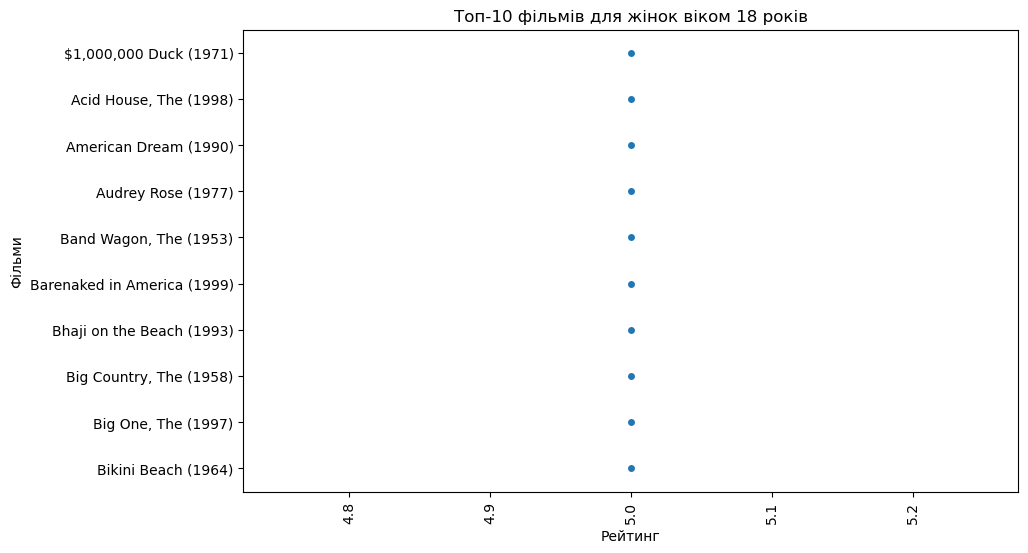

In [17]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Rating', y='Name', data=age_F_18)
plt.xticks(rotation=90)
plt.title('Топ-10 фільмів для жінок віком 18 років')
plt.xlabel('Рейтинг')
plt.ylabel('Фільми')
plt.show()